In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
boston = load_boston()
# 予測のもとになる多次元のデータ
X = pd.DataFrame(boston.data, columns=boston.feature_names)
#　予測の対象になる１次元のデータ
y = pd.Series(boston.target, name='MEDV')

In [3]:
# 説明変数のサイズ
X.shape

(506, 13)

In [4]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
# RMとLSTATだけに
X = X[['RM', 'LSTAT']]

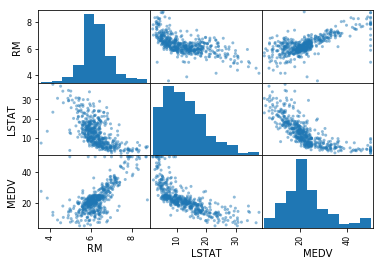

In [6]:
# ヒストグラムと散布図
Xy = pd.concat([X, y.to_frame()], 1)
pd.plotting.scatter_matrix(Xy);

## 回帰分析

X : 説明変数（予測の対象と関係しているものが望ましい）
y : 目的変数

- 単回帰分析　→　説明変数が一つ
- 重回帰分析　→　説明変数が複数

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 予測データ（y_pred）をダミーで作成
np.random.seed(0)
y_pred = y + np.random.randn(len(y)) * 3

In [11]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])
    plt.plot(y_pred, y, '.')

In [12]:
#決定係数を計算
score1 = r2_score(y, y_pred)
score1

0.89458152161946269

In [13]:
# 平均二乗誤差を計算
score2 = mean_squared_error(y, y_pred)
score2

8.8993811555432938

In [14]:
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### モデルの評価基準

- 決定係数（R2, R-squared, coefficient of determination）：決定係数は、モデルの当てはまりの良さを示す指標。寄与率とも言い、1に近いほど良い
    -> sklearn.metrics.r2_score
- 平均二乗誤差（mean square error; MSE）：推定値との差分の自乗の平均。小さいほど良い
    -> sklearn.metrics.mean_squared_error
- 赤池情報量規準（Akaike's Information Criterion; AIC）：元統計数理研究所所長の赤池弘次先生が考案した統計モデルの良さを評価するための指標。小さいほど良い
- ベイズ情報量規準（Bayesian information criterion; BIC）：AICと同じような統計モデルの良さを評価するための指標。小さいほど良い


In [16]:
from sklearn.linear_model import LinearRegression
# 出力時に小数点以下3桁に
%precision 3

'%.3f'

In [17]:
# 線形回帰の作成
lr = LinearRegression()
# フィッティング
lr.fit(X_train[['RM']], y_train)
#パラメータ（定数項と係数）の確認
lr.intercept_, lr.coef_

(-36.181, array([ 9.313]))

In [18]:
#　予測値
y_pred = lr.predict(X_test[['RM']])
# 決定係数
score1 = r2_score(y_test, y_pred)
score1

0.468

In [19]:
# 平均二乗誤差
score2 = mean_squared_error(y_test, y_pred)
score2

43.472

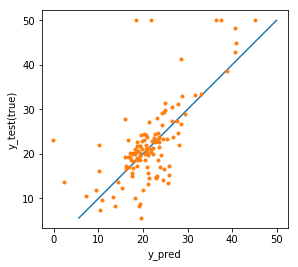

In [22]:
# 予測データ(y_pred)と真値(y_test)を描画
scatter(y_pred, y_test)

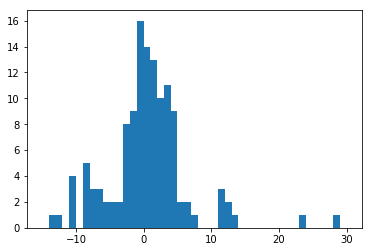

In [23]:
# 残差のヒストグラム
plt.hist(y_test - y_pred, range=(-15, 30), bins=45);

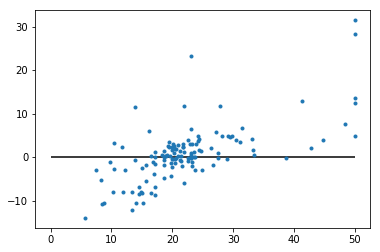

In [24]:
# 目的変数との残差プロット
plt.hlines(0, 50, 0)
plt.plot(y_test, y_test - y_pred, '.');

### 単回帰分析

- 線形（一次式）なので、線形回帰
- y = intercept_ + coef_[0] * X.RM + 誤差という関係式
- intercept_, coef_は、回帰係数あるいは、回帰モデルのパラメーターと呼ぶ
- LinearRegressionでは、最小二乗法という方法で誤差を最小化
    - 最小二乗法は、平均二乗誤差を最小化する方法

### 良いモデルの特徴

- 残差のヒストグラムが、平均が0の正規分布（正規性）
- 残差プロットで、説明変数や目的関数に対して、残差の分散が同じ（等分性）
- 残差プロットで、説明変数や目的関数に対して、残差の分散が同じ（等分性）

### 重回帰分析

In [25]:
# 線形回帰の作成
lr = LinearRegression()
# フィッティング
lr.fit(X_train, y_train)
# パラメータ（定数項と係数）の確認
lr.intercept_, lr.coef_

(-0.605, array([ 5.018, -0.675]))

In [26]:
# 予測値
y_pred = lr.predict(X_test)
# 決定係数
score3 = r2_score(y_test, y_pred)
score3

0.569

In [27]:
# 平均二乗誤差
score4 = mean_squared_error(y_test, y_pred)
score4

35.192

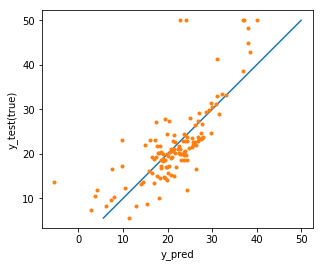

In [28]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

### ロバスト回帰

- RANSAC（RAndom SAmple Consensus: sklearn.linear_model.RANSACRegressor）を使う
- RANSACは、ランダムサンプリングに対しパラメーター推定を繰り返し、最も良い推定結果を出す
- 基本となるモデルをbase_estimatorオプションで指定。省略すると、線形回帰になる（LinearRegression）
- min_samplesオプションで最小サンプル数を指定
- ロバスト回帰を使っても、うまくいくとは限らない

In [30]:
from sklearn.linear_model import RANSACRegressor

In [31]:
# RANSACの作成
ran = RANSACRegressor(min_samples=int(len(X_train)*0.9),
                     random_state=0)
#フィッティング
ran.fit(X_train, y_train)
#パラメータ（定数項と係数）の確認
ran.estimator_.intercept_, ran.estimator_.coef_

(-11.991, array([ 6.467, -0.548]))

In [32]:
# 予測値
y_pred = ran.predict(X_test)
# 決定係数
score = r2_score(y_test, y_pred)
score

0.553

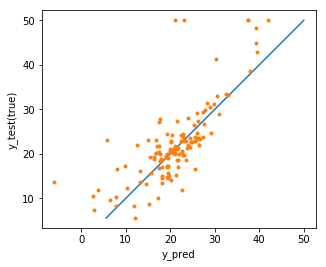

In [33]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

## 線形回帰で、過学習を見てみる

In [34]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(23)
M, N = 80, 32
# ダミーデータ
X = np.random.randn(M, N)
y = X.sum(1) * 0.4 + np.random.randn(M)

In [35]:
# 説明変数の数を変えて評価
res1, res2 = [], []
nums = [1, 2, 4, 8, 12, 16, 20, 24, 28, 32]  # 説明変数の数
for num in nums:
    lst1, lst2 = [], []
    for i in range(20):  # 20回の平均を取る
        X_train, X_test, y_train, y_test = (
            train_test_split(X, y, test_size=M//2, random_state=i))
        lr = LinearRegression().fit(X_train[:, :num], y_train)
        lst1.append(mean_squared_error(y_train, lr.predict(X_train[:, :num])))
        lst2.append(mean_squared_error(y_test, lr.predict(X_test[:, :num])))
    res1.append(np.mean(lst1))
    res2.append(np.mean(lst2))

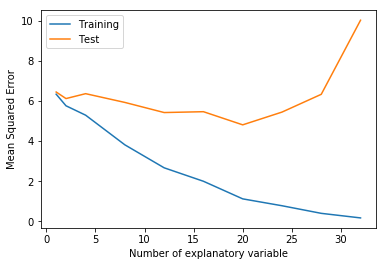

In [36]:
# グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.plot(nums, res1, label='Training')
plt.plot(nums, res2, label='Test')
plt.legend();

### 線形回帰で見る過学習

- モデルは複雑にするほど、過学習が生じる
- 回帰分析で過学習が生じる原因は、
    - モデルが複雑（説明変数が多いなど）
    - トレーニングデータだけで評価
    - 目的変数と相関の小さい説明変数の存在
    - 多重共線性がある説明変数の存在

### 多重共線性とは

- ある説明変数Aと別の説明変数Bの相関が高いとき、多重共線性があると言う


### どうやって汎化性能を高める？

- シンプルなモデル（説明変数を減らすなど）
    - 不要な説明変数を選択しない(目的変数と相関の小さい説明変数や多重共線性がある説明変数の削除)
    - 次元削減を用いた説明変数の削減
- トレーニングデータとテストデータの分割
    - クロスバリデーションによる評価
- 汎化性能の高い評価規準の選択
- 正則化の導入

### 次元削減を行い、効果を確かめる

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
X, y = load_boston(True)  # ボストン市の住宅価格データ一式

In [39]:
# 全説明変数のときの結果
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=len(y)//2, random_state=0))
lr = LinearRegression().fit(X_train, y_train)
score1 = mean_squared_error(y_train, lr.predict(X_train))
score2 = mean_squared_error(y_test, lr.predict(X_test))
score1, score2  # トレーニングデータとテストデータの平均二乗誤差

(19.628, 25.309)

In [40]:
# 次元削減の効果
res1, res2 = [], []
nums = [13, 11, 9, 7, 5, 3]
for num in nums:
    X_pca = PCA(num).fit_transform(X)
    X_train, X_test, y_train, y_test = (
        train_test_split(X_pca, y, test_size=len(y)//2, random_state=0))
    lr = LinearRegression().fit(X_train, y_train)
    res1.append(mean_squared_error(y_train, lr.predict(X_train)))
    res2.append(mean_squared_error(y_test, lr.predict(X_test)))

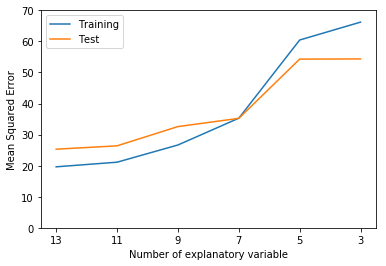

In [41]:
# グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.ylim((0, 70))
plt.xticks(range(len(nums)), nums)
plt.plot(res1, label='Training')
plt.plot(res2, label='Test')
plt.legend();

### 正則化を使う

- パラメーターを推定するときに、誤差だけではなくパラメーター自体の大きさも小さくする
- この追加する項を正則化項（ペナルティー）と言う
- 正則化項にかかる係数を正則化パラメーター（α）と言う
- よく使われる正則化
    - L2ペナルティー：パラメーターの二乗の和。Ridge（リッジ）回帰で使われます。
    - L1ペナルティー：パラメーターの絶対値の和。Lasso（ラッソ）で使われます。
    - L1とL2ペナルティー：L1ペナルティーとL2ペナルティーの重み和。Elastic Net（エラスティックネット）で使われます。


In [42]:
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
X, y = load_boston(True)  # ボストン市の住宅価格データ

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)  # データの分割

In [44]:
# 線形回帰
lr = LinearRegression()
lr.fit(X_train, y_train)
# Ridge回帰
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
# 線形回帰の予測
y_pred1 = lr.predict(X_test)
# 線形回帰の評価
score1 = r2_score(y_test, y_pred1)
# Ridge回帰の予測
y_pred2 = ridge.predict(X_test)
# Ridge回帰の評価
score2 = r2_score(y_test, y_pred2)
score1, score2

(0.635, 0.627)

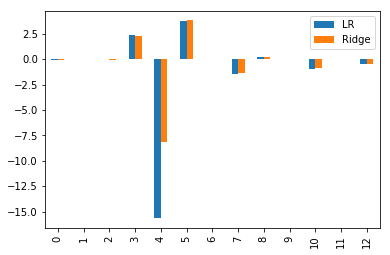

In [46]:
# パラメーターの比較
df = pd.DataFrame({'LR': lr.coef_, 'Ridge': ridge.coef_})
df.plot.bar();

### LassoとElastic Netも使ってみる

In [47]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [48]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
# Elastic Net
enet = ElasticNet(alpha=1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
# Lassoの予測
y_pred3 = lasso.predict(X_test)
# Lassoの評価
score3 = r2_score(y_test, y_pred3)
# Elastic Netの予測
y_pred4 = enet.predict(X_test)
# Elastic Netの評価
score4 = r2_score(y_test, y_pred4)
score3, score4

(0.552, 0.560)

In [50]:
lasso.coef_

array([-0.059,  0.05 , -0.002,  0.   , -0.   ,  0.759,  0.013, -0.71 ,
        0.196, -0.014, -0.806,  0.007, -0.742])

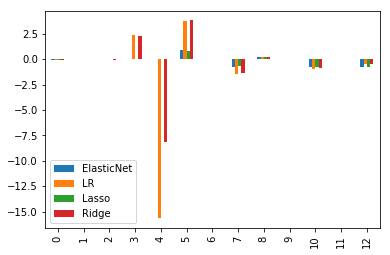

In [51]:
# パラメーターの比較
df = pd.DataFrame({'LR': lr.coef_,
                   'Ridge': ridge.coef_,
                   'Lasso': lasso.coef_,
                   'ElasticNet': enet.coef_})
df.plot.bar();

### αで正則化の強さを調整してみる

- α=0だと、線形回帰と同じ
- l1_ratioを小さくすると、結果的にαも小さくなる。l1_ratioを小さくしたいときは、Ridge回帰を使った方がよい

In [52]:
# Elastic Net
enet0 = ElasticNet(alpha=0)
enet0.fit(X_train, y_train)
y_pred0 = enet0.predict(X_test)
score0 = r2_score(y_test, y_pred0)
score0, score1  # 線形回帰と比較

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.635, 0.635)

In [55]:
# Elastic Net
enet5 = ElasticNet(alpha=1, l1_ratio=0)
enet5.fit(X_train, y_train)
y_pred5 = enet5.predict(X_test)
score5 = r2_score(y_test, y_pred5)
score5, score2  # Ridge回帰と比較

# Ridge回帰を使ったほうが良い

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.566, 0.627)

In [54]:
# Elastic Net
enet6 = ElasticNet(alpha=1, l1_ratio=1)
enet6.fit(X_train, y_train)
y_pred6 = enet6.predict(X_test)
score6 = r2_score(y_test, y_pred6)
score6, score3

(0.552, 0.552)

### Ridge回帰のαを確認する

In [56]:
# 出力時に小数点以下3桁に
%precision 4
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
# サンプルデータ
X, y = load_boston(True)

In [57]:
# αの探索
ridge = RidgeCV(scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.1000

In [58]:
# さらにαの探索
ridge = RidgeCV([0.0001, 0.001, 0.01, 0.1], scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.0001

In [59]:
# 係数の確認
ridge.coef_

array([ -1.0717e-01,   4.6395e-02,   2.0855e-02,   2.6885e+00,
        -1.7795e+01,   3.8048e+00,   7.5044e-04,  -1.4757e+00,
         3.0565e-01,  -1.2328e-02,  -9.5345e-01,   9.3914e-03,  -5.2547e-01])

In [60]:
# 決定係数の確認
r2_score(y, ridge.predict(X))

0.7406

### Lassoのαを確認する

In [61]:
%matplotlib inline
# 出力時に小数点以下3桁に
%precision 3
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [62]:
# αの確認
lasso = LassoCV()
lasso.fit(X, y)
lasso.alpha_

0.725

In [63]:
# αの確認
lasso = LassoCV(eps=0.0001)
lasso.fit(X, y)
lasso.alpha_

0.139

In [64]:
# αの確認
lasso = LassoCV(eps=0.0001, n_alphas=200)
lasso.fit(X, y)
lasso.alpha_

0.145

In [65]:
# 係数の確認
lasso.coef_

array([-0.096,  0.049, -0.028,  0.236, -0.   ,  3.569, -0.007, -1.136,
        0.28 , -0.015, -0.779,  0.01 , -0.582])

In [66]:
# 平均二乗誤差の確認
mean_squared_error(y, lasso.predict(X))

23.264

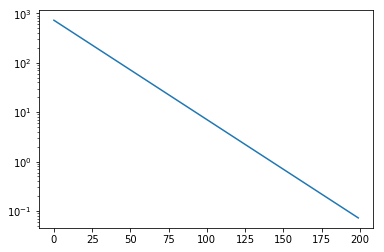

In [67]:
# αの探索リスト
plt.yscale('log')
plt.plot(lasso.alphas_);

### Elastic Netでも確認

In [68]:
# 出力時に小数点以下3桁に
%precision 3
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [69]:
# l1_ratioの探索リスト
l1_ratio = np.arange(0.1, 1.1, 0.1)
l1_ratio

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [70]:
# l1_ratioとαの探索
enet = ElasticNetCV(l1_ratio=l1_ratio)
enet.fit(X, y)
enet.l1_ratio_, enet.alpha_

(0.600, 1.208)

In [71]:
# αの探索リストの範囲
enet.alphas_.min(), enet.alphas_.max()

(0.725, 7248.204)

In [72]:
# 平均二乗誤差
mean_squared_error(y, enet.predict(X))

27.238

In [73]:
# l1_ratioとαの探索
enet = ElasticNetCV(l1_ratio=l1_ratio, eps=0.0001)
enet.fit(X, y)
enet.l1_ratio_, enet.alpha_

(0.200, 0.479)

In [74]:
# αの探索リストの範囲
enet.alphas_.min(), enet.alphas_.max()

(0.072, 7248.204)

In [75]:
# 平均二乗誤差
mean_squared_error(y, enet.predict(X))

24.934